In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from C4_theo_asymptotique__trapz import C4_court, C4_long
from DoubleRigidWallOverdampedBrownExp_Cython import RigidWallOverdampedLangevin3D
from Physic_function_problem import *
import cythonised_simu_part

from scipy.integrate import quad
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from mpltools import annotation

import csv


def cm2inch(value):
    return value / 2.54

from tqdm import tqdm


from matplotlib import rc
import seaborn as sns
custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 0.3,
    "figure.dpi": 200,
    "text.usetex": True,
    "font.family": "serif",
    "font.size":8,
    'axes.titlesize':10,
    'axes.labelsize':10,
}
# sns.set_context("notebook", rc={"lines.linewidth": 3})


sns.set_theme(context = "paper", style="ticks", rc=custom_params)

In [2]:
# mpl.rcParams.keys()

In [3]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 40e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

zz = np.linspace(-H+H*1e-3, H-H*1e-3, 1000)

dt = 1e-2
Nt = 10000000
Nt_sub = 1
tt = np.linspace(dt, dt*Nt, Nt)

In [4]:
simu = RigidWallOverdampedLangevin3D(dt=dt, Nt=Nt, a=a, H=H, lD=lD, lB=lB, B=B, Nt_sub=Nt_sub)
simu.trajectory()

# Trajectory

In [5]:
Rs = np.zeros([Nt, 3])
Rs[:,0] = simu.x
Rs[:,1] = simu.y
Rs[:,2] = simu.z

In [6]:
def plot_3D(ax, N: int = 20, N_c: int = 500):
    """
    Plot the trajectory in 3D, using N chunks of N_c points with a gradient of color indicating the time.
    """
    plt.ioff()
    plt.ion()
    
    cmap = plt.get_cmap("jet")

    for i in range(N - 1):
        ax.plot(
            simu.x[i * N_c : i * N_c + N_c],
            simu.y[i * N_c : i * N_c + N_c],
            simu.z[i * N_c : i * N_c + N_c],
            color=plt.cm.jet(1 * i / N), alpha = 0.9
        )
        
    ax = plt.gca()
    ax.ticklabel_format(style="sci")

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])



# PDF$(z)$ et $D(z)$ $\|$ et $\perp$

In [7]:
# PDF(z)
position = Rs[:, 2]
bins=80

hist_z, bin_edges = np.histogram(position[position < 30e-6], bins=bins, density=False)
binsPositions = (bin_edges[:-1] + bin_edges[1:]) / 2 
pdf = hist_z / np.trapz(hist_z, binsPositions*1e6)

z_Peq = np.linspace(-H, -32e-6, 1000)

In [8]:
# fig = plt.figure(figsize = (4, 4/1.2),  tight_layout=True)

# ax1 = plt.subplot(221)
# x    = simu.x*1e6
# y    = simu.y*1e6
# cols = tt

# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)

# lc = LineCollection(segments, cmap='viridis')
# lc.set_array(cols)
# lc.set_linewidth(2)
# line = ax1.add_collection(lc)
# fig.colorbar(line,ax=ax1, location="right")
# ax1.set(
#     xlabel = r"$x$ ($\mu$m)",
#     ylabel = r"$y$ ($\mu$m)",
# )
# ax1.set_xlim(min(x), max(x))
# ax1.set_ylim(min(y), max(y))


# ax2 = plt.subplot(222)
# x    = simu.x*1e6
# y    = simu.z*1e6
# cols = tt
# points = np.array([x, y]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# lc = LineCollection(segments, cmap='viridis')
# lc.set_array(cols)
# lc.set_linewidth(2)
# line = ax2.add_collection(lc)
# fig.colorbar(line,ax=ax2, location="right")
# ax2.set(
#     xlabel = r"$x$ ($\mu$m)",
#     ylabel = r"$z$ ($\mu$m)",
# )
# ax2.set_xlim(min(x), max(x))
# ax2.set_ylim(min(y), max(y))


# ax3 = plt.subplot(223)
# ax3.plot(zz, D_para(zz, a, eta, H)/D_0(zz, a, eta), "-", label=r"$D_\|(z)$")
# ax3.plot(zz, D_perp(zz, a, eta, H)/D_0(zz, a, eta), "-", color="tab:green", label=r"$D_\perp(z)$")
# ax3.set(
#     xlabel = r"$z$ (m)",
#     ylabel = r"$D(z)/D_0$",
# )


# ax4 = plt.subplot(224)
# ax4.semilogy(binsPositions*1e6, pdf, "o", color="tab:green", label=r"$\mathrm{Simulation}$")
# ax4.plot(z_Peq*1e6, P_eq(z_Peq, B, lD, lB, H)/np.trapz(P_eq(z_Peq, B, lD, lB, H), z_Peq), "k-", label=r"$\mathrm{Theory}$",)
# ax4.set(
#     xlabel = r"$z$ ($\mu$m)",
#     ylabel = r"$P_\mathrm{eq}(z)$ (m$^{-1}$)",
# )

# fig.tight_layout()
# # plt.savefig("Figures/traj_Dz_PDFz_Version2.pdf")

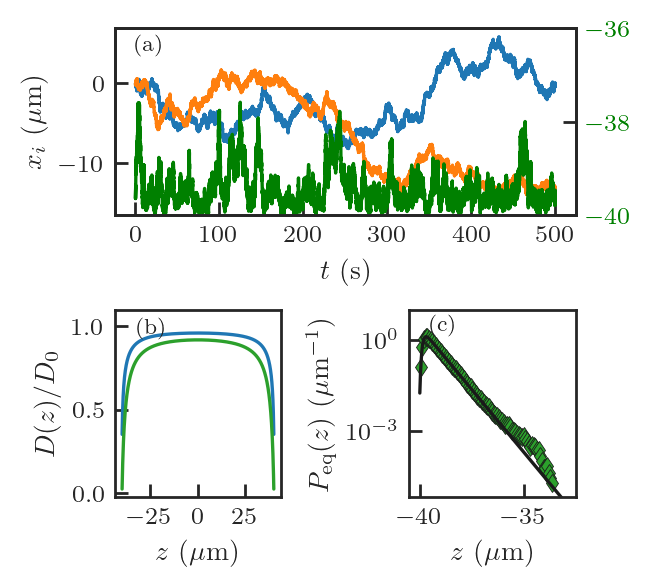

In [9]:
fig = plt.figure(figsize = (3.3, 5/1.68),  tight_layout=True)

ax1 = plt.subplot(211)
ax11=ax1.twinx()
ax11.plot(tt[:50000], simu.z[:50000]*1e6, "-", color="green")
ax11.set_ylabel("",color="green")
ax11.tick_params(axis='y', labelcolor="green")
ax11.set_ylim(-40, -36)
ax1.plot(tt[:50000], simu.x[:50000]*1e6, color="tab:blue")
ax1.plot(tt[:50000], simu.y[:50000]*1e6,  color="tab:orange")
ax1.set(
    xlabel = r"$t$ (s)",
    ylabel = r"$x_i$ ($\mu$m)",
)
ax1.text(0, 4, r"(a)", transform=ax1.transData)

ax2 = plt.subplot(223)
ax2.plot(zz*1e6, D_para(zz, a, eta, H)/D_0(zz, a, eta), "-", color="tab:blue", label=r"$D_\|(z)$")
ax2.plot(zz*1e6, D_perp(zz, a, eta, H)/D_0(zz, a, eta), "-", color="tab:green", label=r"$D_\perp(z)$")
ax2.set(
    xlabel = r"$z$ ($\mu$m)",
    ylabel = r"$D(z)/D_0$",
)
ax2.set_ylim(None, 1.1)
ax2.text(-32, 0.95, r"(b)", transform=ax2.transData)


ax3 = plt.subplot(224)
ax3.semilogy(binsPositions*1e6, pdf, "d", color="tab:green", label=r"$\mathrm{Simulation}$")
ax3.plot(z_Peq*1e6, P_eq(z_Peq, B, lD, lB, H)/np.trapz(P_eq(z_Peq, B, lD, lB, H), z_Peq*1e6), "k-", label=r"$\mathrm{Theory}$",)
ax3.set(
    xlabel = r"$z$ ($\mu$m)",
    ylabel = r"$P_\mathrm{eq}(z)$ ($\mu$m$^{-1}$)",
)
ax3.set_xlim(-40.5, -32.5)
ax3.set_ylim(7e-6, 10)
ax3.text(-39.5, 2, r"(c)", transform=ax3.transData)

fig.tight_layout()

# plt.savefig("Figures/traj_Dz_PDFz.pdf")

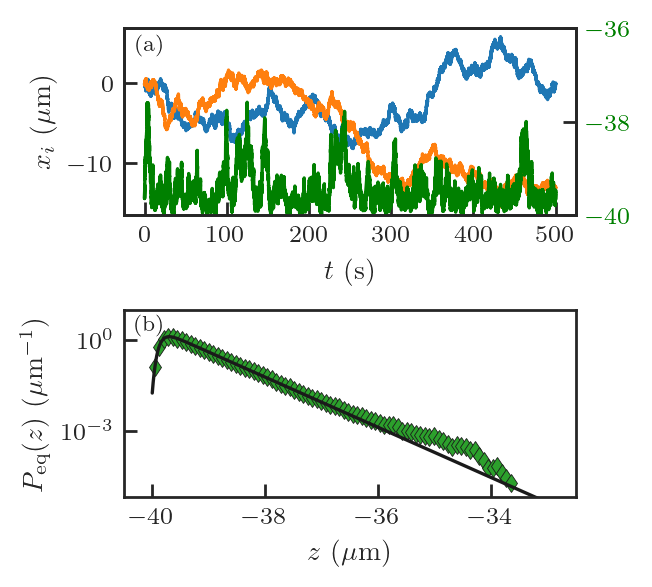

In [202]:
fig = plt.figure(figsize = (3.3, 5/1.68),  tight_layout=True)

ax1 = plt.subplot(211)
ax11=ax1.twinx()
ax11.plot(tt[:50000], simu.z[:50000]*1e6, "-", color="green")
ax11.set_ylabel("",color="green")
ax11.tick_params(axis='y', labelcolor="green")
ax11.set_ylim(-40, -36)
ax1.plot(tt[:50000], simu.x[:50000]*1e6, color="tab:blue")
ax1.plot(tt[:50000], simu.y[:50000]*1e6,  color="tab:orange")
ax1.set(
    xlabel = r"$t$ (s)",
    ylabel = r"$x_i$ ($\mu$m)",
)
ax1.text(-10, 4, r"(a)", transform=ax1.transData)


ax3 = plt.subplot(212)
ax3.semilogy(binsPositions*1e6, pdf, "d", color="tab:green", label=r"$\mathrm{Simulation}$")
ax3.plot(z_Peq*1e6, P_eq(z_Peq, B, lD, lB, H)/np.trapz(P_eq(z_Peq, B, lD, lB, H), z_Peq*1e6), "k-", label=r"$\mathrm{Theory}$",)
ax3.set(
    xlabel = r"$z$ ($\mu$m)",
    ylabel = r"$P_\mathrm{eq}(z)$ ($\mu$m$^{-1}$)",
)
ax3.set_xlim(-40.5, -32.5)
ax3.set_ylim(7e-6, 10)
ax3.text(-40.3, 2, r"(b)", transform=ax3.transData)

fig.tight_layout()

# plt.savefig("Figures/traj_PDFz.pdf")

# MSD et PDF($\Delta x$)

In [10]:
tau_MSDx, msd_x = simu.MSD("x")

100%|███████████████████████████████████████████| 63/63 [00:01<00:00, 49.62it/s]


In [11]:
tau_MSDz, msd_z = simu.MSD("z")

100%|███████████████████████████████████████████| 63/63 [00:01<00:00, 47.95it/s]


In [12]:
mean_Dx = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_para(zz, a, eta, H), zz)
mean_Dz = np.trapz(P_eq(zz, B, lD, lB, H)/np.trapz(P_eq(zz, B, lD, lB, H), zz)*D_perp(zz, a, eta, H), zz)

In [13]:
mean_Dz

3.84014987009805e-14

In [14]:
# def P_eq(z, B, lD, lB, H):
#     return np.array([_P_eq(i, B, lD, lB, H) for i in z])

# def _P_eq(z, B, lD, lB, H):
#     # if (z > H) or (z < H):
#     #     return 0
#     return np.exp(-B * np.exp(-H / lD) * (np.exp(-z / lD) + np.exp(z / lD)) - (H+z) / lB) 

# def _Pdeltaz_long(dZ, B, lD, lB, H):
#     z = np.linspace(-H, +H, 1000)
#     dP = P_eq(z, B, lD, lB, H) * P_eq(z + dZ, B, lD, lB, H)
#     P = np.trapz(dP,z)
#     return P

# def Pdeltaz_long(dZ, B, lD, lB, H):
#     pdf = np.array([_Pdeltaz_long(i, B, lD, lB, H) for i in dZ])
#     pdf = pdf / np.trapz(pdf,dZ)
#     return pdf

In [15]:
# plt.plot(np.linspace(-40e-6, 40e-6),Pdeltaz_long(np.linspace(-40e-6, 40e-6), 5, 80e-9, 500e-9, 40e-6))

In [75]:
N_tau = 1

# tau_theo = np.linspace(5e-3, 5e6, 1000)
# PDF(dX)
dX = simu.x[N_tau:] - simu.x[:-N_tau]
std_num_dX = np.std(dX)
hist, bin_edges = np.histogram(dX, bins=50, density=False)
binsPositions_dX = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dX = hist / np.trapz(hist, binsPositions_dX*1e6)


# PDF(dZ) court
dZ = simu.z[N_tau:] - simu.z[:-N_tau]
std_num_dZ = np.std(dZ)
hist, bin_edges = np.histogram(dZ, bins=50, density=False)
binsPositions_dZ = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dZ = hist / np.trapz(hist, binsPositions_dZ*1e6)

# PDF(dZ) long
N_tau_long = 10000
dZ_long = simu.z[N_tau_long:] - simu.z[:-N_tau_long]
std_num_dZ_long = np.std(dZ_long)
hist, bin_edges = np.histogram(dZ_long, bins=50, density=False)
binsPositions_dZ_long = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf_dZ_long = hist / np.trapz(hist, binsPositions_dZ_long*1e6)

dXX = np.linspace(-0.5, +0.5, 1000)
PDF_theory_x = P_Di_short_time(dXX*1e-6, dt*N_tau, D_para, a, eta, B, lD, lB, H)

dZZ = np.linspace(-0.8, +0.8, 1000)
PDF_theory_z = P_Di_short_time(dZZ*1e-6, dt*N_tau, D_perp, a, eta, B, lD, lB, H)

dZZ_long = np.linspace(-2*(H), 2*(H), 10000)
PDF_theory_z_long = Pdeltaz_long(dZZ_long, B, lD, lB, H)

plateau = np.trapz(dZZ_long**2 * PDF_theory_z_long, dZZ_long)

plateauC4z = np.trapz(dZZ_long**4 * PDF_theory_z_long, dZZ_long)

In [203]:
N_tau*dt, N_tau_long*dt

(0.01, 100.0)

In [77]:
plateauC4z = np.trapz(dZZ_long**4 * PDF_theory_z_long , dZZ_long) - 3 * np.trapz(dZZ_long**2 * PDF_theory_z_long , dZZ_long) ** 2 

# Cumulant 4

In [50]:
data_simu = loadmat("C4_Datas/dataC4Ssimu_papier.mat", squeeze_me=True)


c4_simu = data_simu["C4"]
time_c4_simu = data_simu["t"]

In [51]:
D4_long_theo = 1.2691e-27 #1.5074e-27
C4_long_theo = 1.0350e-26 #1.4039e-26
A4_theo_x = C4_court(D=D_para, Peq=P_eq, kBT=kBT, B=B, lD=lD, lB=lB, H=H, a=a, eta=eta, dx=1e-8)
A4_theo_z = C4_court(D=D_perp, Peq=P_eq, kBT=kBT, B=B, lD=lD, lB=lB, H=H, a=a, eta=eta, dx=1e-8)

t_short = np.linspace(1e-4, 50, 1000)
t_long = np.linspace(20, 1e5, 1000)

# Convergence

In [52]:
n_court = 0
n_mid = 30
n_long = -6


## -> plot C4

In [53]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# X datas
Datas_parquet = "C4_Datas/convergence_7_50_sigma__lD_8p800000e-08_lB_5p260000e-07_B_5p000000e+00_H_4p000000e-05_a_1p519000e-06_dt_1p000000e-02_Nt_1000000_Ntsub_1_/"

dt = float(Datas_parquet.replace("p", ".").split("_")[-6])

#Récupération des datas
pd.read_parquet(Datas_parquet+'/1', engine='pyarrow')
files=glob.glob(Datas_parquet+"/*")

# Les mettres dans l'ordre
Ntime = []
for i in files:
    Ntime.append(int(i.split("/")[-1]))

I=np.argsort(Ntime)
files = [files[i] for i in I]

Ntime = np.sort(Ntime)

len(files)

47

In [55]:
# Z datas
Datas_parquet_z = "C4_Datas/z_convergence_7_50_sigma__lD_8p800000e-08_lB_5p260000e-07_B_5p000000e+00_H_4p000000e-05_a_1p519000e-06_dt_1p000000e-02_Nt_1000000_Ntsub_1_/"
dt = float(Datas_parquet_z.replace("p", ".").split("_")[-6])

#Récupération des datas
pd.read_parquet(Datas_parquet_z+'/1', engine='pyarrow')
files_z=glob.glob(Datas_parquet_z+"/*")

# Les mettres dans l'ordre
Ntime_z = []
for i in files_z:
    Ntime_z.append(int(i.split("/")[-1]))

I=np.argsort(Ntime_z)
files_z = [files_z[i] for i in I]

Ntime_z = np.sort(Ntime_z)

len(files_z)


47

In [56]:
dt = float(Datas_parquet.replace("p", ".").split("_")[-6])

tau_x = Ntime*dt
tau_z= Ntime_z*dt


In [57]:
# Calcul C4 avec MÉTHODE_1 <PDF> -> C4

C4_x = []
for i in tqdm(files):
    datas = pd.read_parquet(i)
    dx = np.array(datas.columns).astype(float)
    
    #Moyenne des PDFs
    datas = datas.to_numpy()
    datas = np.sum(datas, axis=0)
    datas = datas / np.trapz(datas, dx)
    
    #Calcul du C4_x
    C4_x.append(np.trapz(dx**4 *datas, dx) - 3* (np.trapz(dx**2 * datas, dx))**2)



100%|███████████████████████████████████████████| 47/47 [00:14<00:00,  3.22it/s]


In [58]:
files_z[29]

'C4_Datas/z_convergence_7_50_sigma__lD_8p800000e-08_lB_5p260000e-07_B_5p000000e+00_H_4p000000e-05_a_1p519000e-06_dt_1p000000e-02_Nt_1000000_Ntsub_1_/1842'

In [59]:
# Calcul C4_z avec MÉTHODE_1 <PDF> -> C4

C4_z = []
for i in tqdm(files_z):
    datas_z = pd.read_parquet(i)
    dz = np.array(datas_z.columns).astype(float)
    
    #Moyenne des PDFs
    datas_z = datas_z.to_numpy()
    datas_z = np.sum(datas_z, axis=0)
    datas_z = datas_z / np.trapz(datas_z, dz)
    
    #Calcul du C4_x
    C4_z.append(np.trapz(dz**4 *datas_z, dz) - 3* (np.trapz(dz**2 * datas_z, dz))**2)



100%|███████████████████████████████████████████| 47/47 [00:17<00:00,  2.68it/s]


In [61]:
# Calcul C4 avec MÉTHODE_2 PDF -> C4 -> <C4>

# C4_xM2 = []

# for i in tqdm(files):
#     datas = pd.read_parquet(i)
#     dx = np.array(datas.columns).astype(float)
#     tampon = []
#     #PDFs
#     datas = datas.to_numpy()
#     for j in (range(len(datas[:,0]))):
#         if sum(datas[j, :]) != 0:
#             #Calcul des C4_x
#             PDF = datas[j,:] / np.trapz(datas[j,:], dx)
#             tampon.append( np.trapz(dx**4 *PDF, dx) - 3* (np.trapz(dx**2 * PDF, dx))**2 )
    
#     # Moyenne des C4s
#     C4_xM2.append(np.mean(tampon))

# del tampon
# del PDF


In [62]:
# datas[0,:] / np.trapz(datas[0,:], dx)

In [63]:
# from scipy.io import savemat

# C4_from_methode2 = {}
# C4_from_methode2["time (s)"] = tau_x
# C4_from_methode2["C4 (m^4)"] = C4_xM2

# savemat("C4_Datas/C4_ComputeWithMethode2_MeanOfC4.mat", C4_from_methode2)

In [64]:
M2_c4 = loadmat("C4_Datas/C4_ComputeWithMethode2_MeanOfC4.mat", squeeze_me=True)
np.shape(M2_c4["C4 (m^4)"])

(47,)

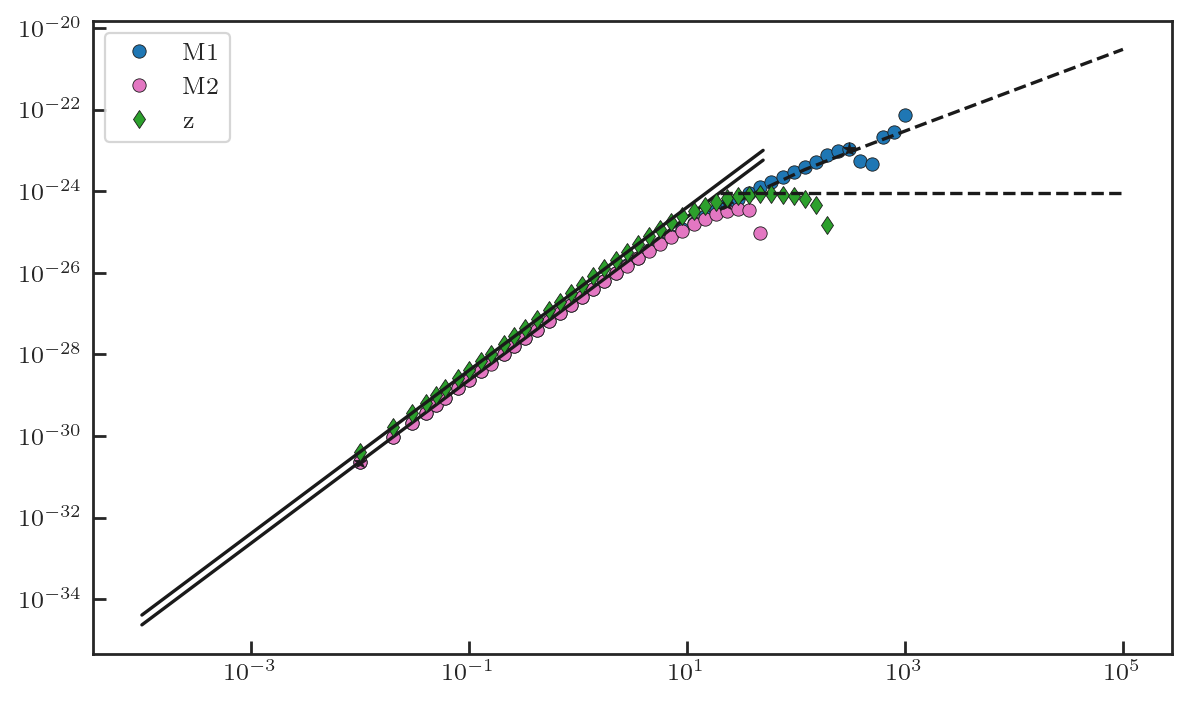

In [83]:
fig = plt.figure(figsize = (6, 6/1.68),  tight_layout=True)

ax1 = plt.subplot(111)

ax1.loglog(tau_x, C4_x, "o", color="tab:blue", label="M1")
ax1.loglog(M2_c4["time (s)"], M2_c4["C4 (m^4)"], "o", color="tab:pink", label="M2")
ax1.plot(tau_x[n_court], C4_x[n_court], "k*")
ax1.plot(tau_x[n_mid], C4_x[n_mid], "k*")
ax1.plot(tau_x[n_long], C4_x[n_long], "k*")
ax1.plot(t_short, A4_theo_x*t_short**2, "k-" )
ax1.plot(t_long, 24*D4_long_theo*t_long-24*C4_long_theo, "k--" )

ax1.loglog(tau_z, C4_z, "d", color="tab:green", label="z")
ax1.plot(t_short, A4_theo_z*t_short**2, "k-" )
ax1.plot(t_long, plateauC4z*np.ones(len(t_long)), "k--" )

plt.legend()

In [66]:
C4_x[n_long]

1.1089700003648748e-23

\begin{equation}
\langle X^4 \rangle_\mathrm{c} = \langle X^4 \rangle - 3 \langle X^2 \rangle^2
\end{equation}

donc 
\begin{equation}
\frac{\langle X^4 \rangle_\mathrm{c}}{\langle X^2 \rangle^2} = \frac{\langle X^4 \rangle}{\langle X^2 \rangle^2} - 3
\end{equation}

avec $\langle X^2 \rangle^2 = (2 \langle D_\|\rangle \tau)^2$

quand $\tau \rightarrow 0$, $\langle X^4 \rangle_\mathrm{c} \rightarrow A_4 \tau^2$ donc $\frac{\langle X^4 \rangle_\mathrm{c}}{\langle X^2 \rangle^2} \rightarrow \frac{A_4}{4 \langle D_\| \rangle^2 } $


In [67]:
# Calcul C4 normalisé

C4_x_normalised = []
for i in tqdm(files):
    datas = pd.read_parquet(i)
    dx = np.array(datas.columns).astype(float)
    
    #Moyenne des PDFs
    datas = datas.to_numpy()
    datas = np.sum(datas, axis=0)
    datas = datas / np.trapz(datas, dx)
    
    #Calcul du C4_x_
    C4_x_normalised.append(np.trapz(dx**4 *datas, dx)/(np.trapz(dx**2 * datas, dx)**2) - 3)



100%|███████████████████████████████████████████| 47/47 [00:17<00:00,  2.76it/s]


In [93]:
# Calcul C4_z normalisé
I would like to add that we will have to include more references about the Brownian yet non Gaussian motion. Also, we have done our best to include sentences on the inference problem but we also have to include some references about this problem, and maybe to explain it  better. Submission is close but you have time to read it carefully and mention any correction you want to make. 
C4_z_normalised = []
for i in tqdm(files_z):
    datas_z = pd.read_parquet(i)
    dz = np.array(datas_z.columns).astype(float)
    
    #Moyenne des PDFs
    datas_z = datas_z.to_numpy()
    datas_z = np.sum(datas_z, axis=0)
    datas_z = datas_z / np.trapz(datas_z, dz)
    
    #Calcul du C4_x_
    C4_z_normalised.append(np.trapz(dz**4 *datas_z, dz)/(np.trapz(dz**2 * datas_z, dz)**2) - 3)



100%|███████████████████████████████████████████| 47/47 [00:14<00:00,  3.21it/s]


[Text(0.5, 0, '$\\tau$ (s)'),
 Text(0, 0.5, '$\\frac{\\langle X^4 \\rangle }{ \\langle X^2 \\rangle^2} - 3$')]

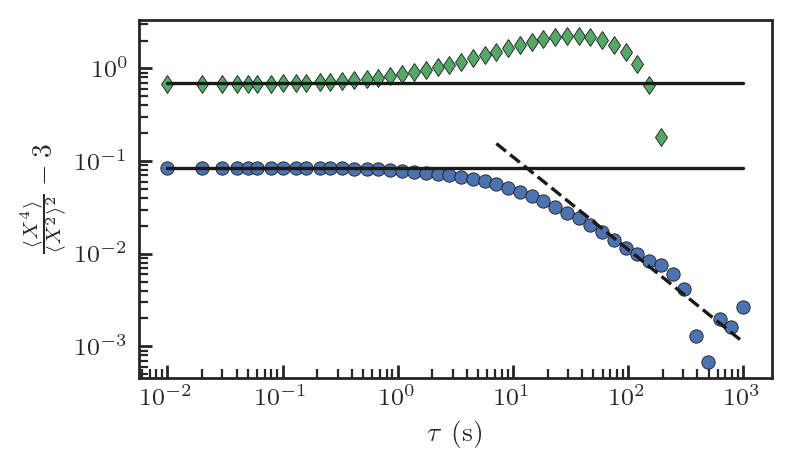

In [99]:
fig = plt.figure(figsize = (4, 4/1.68),  tight_layout=True)

ax1 = plt.subplot(111)

ax1.loglog(tau_x, C4_x_normalised, "o", label="M1")
ax1.loglog(tau_z, C4_z_normalised, "gd", label="M1")
ax1.plot(tau_x, np.ones(len(tau_x))*A4_theo_x/(4*mean_Dx**2), "k-")
ax1.plot(tau_z, np.ones(len(tau_z))*A4_theo_z/(4*mean_Dz**2), "k-")

# ax1.plot(tau_z, np.ones(len(tau_z))*plateauC4z/plateau, "k--")
ax1.plot(tau_x[25:], 24*D4_long_theo/(4*mean_Dx**2) / tau_x[25:] , "k--")
ax1.set(
    xlabel = r"$\tau$ (s)",
    ylabel = r"$\frac{\langle X^4 \rangle }{ \langle X^2 \rangle^2} - 3$",
)
# plt.legend()

In [97]:
plateauC4z/plateau

1.6022919442698723e-12

In [69]:
# fig = plt.figure(figsize = (3.5, 7/1.68),  tight_layout=True)

# ax1 = plt.subplot(331)
# ax1.semilogy(binsPositions_dX*1e6, pdf_dX/np.trapz(pdf_dX,binsPositions_dX*1e6), "o", label=r"Simulation $x$")
# ax1.plot(dXX, PDF_theory_x/np.trapz(PDF_theory_x,dXX), "k-",label=r"Gaussian")
# ax1.plot(dXX, gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)) / np.trapz(gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)), dXX), "r--",label=r"Gaussian")
# ax1.set_xlim(-0.25, 0.25)
# ax1.set_ylim(8e-6, 13)
# ax1.set(
#     xlabel = r"$\Delta x$ ($\mu$m)",
#     ylabel = r"$\displaystyle{\lim_{\tau \to 0}} P(\Delta x)$  ($\mu$m$^{-1}$)",
# )


# ax2 = plt.subplot(332)
# ax2.semilogy(binsPositions_dZ*1e6, pdf_dZ/np.trapz(pdf_dZ,binsPositions_dZ*1e6), "d", color="tab:green")
# ax2.plot(dZZ, PDF_theory_z/np.trapz(PDF_theory_z,dZZ), "k-", label="Theory")
# ax2.plot(dZZ, gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)) / np.trapz(gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)), dZZ), "r--",)
# ax2.set_xlim(-0.22, 0.22)
# ax2.set_ylim(2e-6, 25)
# ax2.set(
#     xlabel = r"$\Delta z$ ($\mu$m)",
#     ylabel = r"$\displaystyle{\lim_{\tau \to 0}} P(\Delta z)$  ($\mu$m$^{-1}$)",
# )


# ax3 = plt.subplot(333)
# ax3.semilogy(binsPositions_dZ_long*1e6, pdf_dZ_long/np.trapz(pdf_dZ_long,binsPositions_dZ_long*1e6), "d", color="tab:green")
# ax3.plot(dZZ_long*1e6, PDF_theory_z_long/np.trapz(PDF_theory_z_long,dZZ_long*1e6), "k-")
# ax3.set_xlim(-7, 7)
# ax3.set_ylim(1e-6, 1.5)
# ax3.set(
#     xlabel = r"$\Delta z$ ($\mu$m)",
#     ylabel = r"$\displaystyle{\lim_{\tau \to \infty}} P(\Delta z)$  ($\mu$m$^{-1}$)",
# )

# ax4 = plt.subplot(312)
# ax4.plot(tau_theo, 2*tau_theo*mean_Dx, "k-", label=r"$2 \langle D_{\|}(z) \rangle_0 \tau$")
# ax4.plot(tau_theo, 2*tau_theo*mean_Dz, "-", color="grey", label=r"$2 \langle D_{\perp}(z) \rangle_0 \tau$")
# ax4.plot(np.linspace(1, 5e6, 1000), plateau*np.ones(1000), "--",color="grey")
# ax4.loglog(tau_MSDx[:-9], msd_x[:-9], "o", color="tab:blue", label=r"$x_\|$")
# ax4.loglog(tau_MSDz[:-9], msd_z[:-9], "d", color="tab:green", label=r"$z$")
# ax4.set_xlim(9e-3, 2e4)
# ax4.set_ylim(None, 1e-8)
# ax4.set(
#     xlabel = r"$\tau$ (s)",
#     ylabel = r"$\langle \Delta x_i^2 \rangle$ $(\mathrm{m}^2)$",
# )


# ax5 = plt.subplot(313)
# ax5.loglog(tau_x[:-5], C4_x[:-5], "o", color="tab:blue")
# ax5.plot(t_short, A4_theo_x*t_short**2, "k-" )
# ax5.plot(tau_x[n_court], C4_x[n_court], "k*")
# ax5.plot(tau_x[n_mid], C4_x[n_mid], "k*")
# ax5.plot(tau_x[n_long], C4_x[n_long], "k*")
# ax5.plot(t_long, 24*D4_long_theo*t_long-24*C4_long_theo, "k--" )
# ax5.set_xlim(9e-3, 2e4)
# ax5.set_ylim(1e-32, 1e-20)
# ax5.set(
#     xlabel = r"$\tau$ (s)",
#     ylabel = r"$\langle \Delta x_i^4 \rangle_\mathrm{c}$ $(\mathrm{m}^4)$",
# )

# # plt.savefig("Figures/PDF_MSD_C4.pdf")

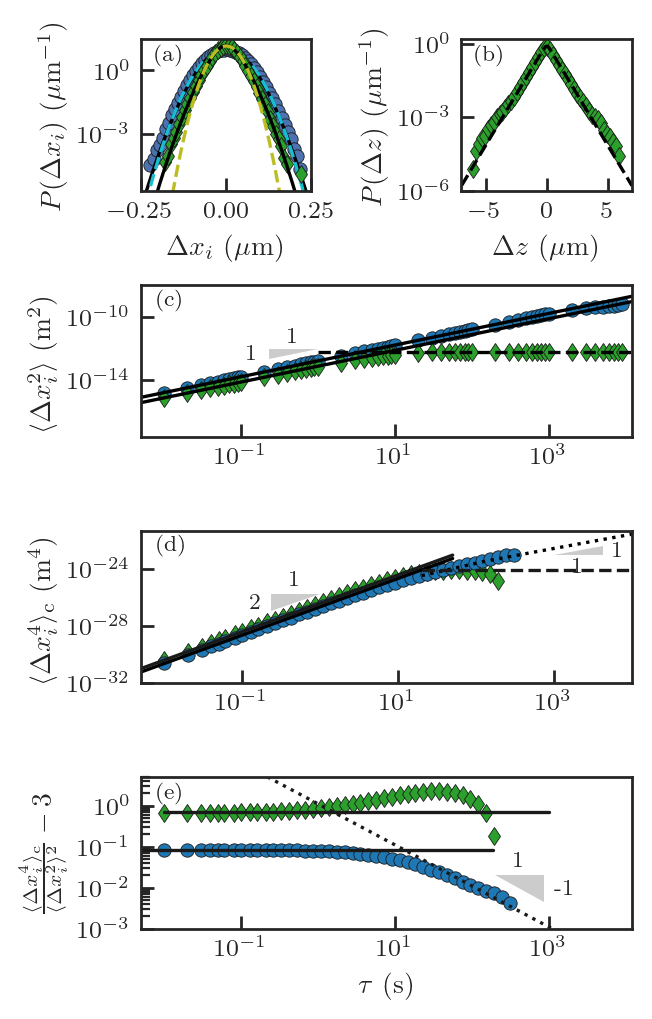

In [176]:
tau_theo = np.logspace(-4, 5, 100)

fig = plt.figure(figsize = (3.3, 8.5/1.68),  tight_layout=True)

ax1 = plt.subplot(421)
ax1.semilogy(binsPositions_dX*1e6, pdf_dX/np.trapz(pdf_dX,binsPositions_dX*1e6), "o", label=r"Simulation $x$")
ax1.plot(dXX, PDF_theory_x/np.trapz(PDF_theory_x,dXX), "-", color="black", label=r"Theory")
ax1.plot(dXX, gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)) / np.trapz(gauss(dXX*1e-6, 0, np.sqrt(2*mean_Dx*dt*N_tau)), dXX), "--", color="tab:cyan", label=r"Gaussian")


ax1.semilogy(binsPositions_dZ*1e6, pdf_dZ/np.trapz(pdf_dZ,binsPositions_dZ*1e6), "d", color="tab:green")
ax1.plot(dZZ, PDF_theory_z/np.trapz(PDF_theory_z,dZZ), "-", color="black", label="Theory")
ax1.plot(dZZ, gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)) / np.trapz(gauss(dZZ*1e-6, 0, np.sqrt(2*mean_Dz*dt*N_tau)), dZZ), "--", color="tab:olive",)
ax1.set_xlim(-0.25, 0.25)
ax1.set_ylim(2e-6, 30)
ax1.set(
    xlabel = r"$\Delta x_i$ ($\mu$m)",
    ylabel = r"$P(\Delta x_i)$  ($\mu$m$^{-1}$)",
)
ax1.text(-0.21, 3, r"(a)", transform=ax1.transData)


ax2 = plt.subplot(422)

ax2.semilogy(binsPositions_dZ_long*1e6, pdf_dZ_long/np.trapz(pdf_dZ_long,binsPositions_dZ_long*1e6), "d", color="tab:green")
ax2.plot(dZZ_long*1e6, PDF_theory_z_long/np.trapz(PDF_theory_z_long,dZZ_long*1e6), "--", color="black",)
ax2.set_xlim(-7, 7)
ax2.set_ylim(1e-6, 1.5)
ax2.set(
    xlabel = r"$\Delta z$ ($\mu$m)",
    ylabel = r"$P(\Delta z)$  ($\mu$m$^{-1}$)",
)
ax2.text(-5.9, 2e-1, r"(b)", transform=ax2.transData)



ax4 = plt.subplot(412)
ax4.loglog(tau_MSDx[:-9], msd_x[:-9], "o", color="tab:blue", label=r"$x_\|$")
ax4.loglog(tau_MSDz[:-9], msd_z[:-9], "d", color="tab:green", label=r"$z$")
ax4.plot(tau_theo, 2*tau_theo*mean_Dx, "-", color="black", label=r"$2 \langle D_{\|}(z) \rangle_0 \tau$")
ax4.plot(tau_theo, 2*tau_theo*mean_Dz, "-", color="black", label=r"$2 \langle D_{\perp}(z) \rangle_0 \tau$")
ax4.plot(np.linspace(1, 5e6, 1000), plateau*np.ones(1000), "--",color="black")
ax4.set_xlim(5e-3, 1.2e4)
ax4.set_ylim(None, 1e-8)
ax4.set(
    # xlabel = r"$\tau$ (s)",
    ylabel = r"$\langle \Delta x_i^2 \rangle$ $(\mathrm{m}^2)$",
)
annotation.slope_marker((1, 1e-12), (1, 1), ax=ax4, invert=True)
ax4.text(8e-3, 5e-10, r"(c)", transform=ax4.transData)


ax5 = plt.subplot(413)

ax5.loglog(tau_z, C4_z, "d", color="tab:green", label="z")
ax5.loglog(tau_x[:-5], C4_x[:-5], "o", color="tab:blue")

ax5.plot(t_short, A4_theo_x*t_short**2, "-", color="black")
ax5.plot(t_long, 24*D4_long_theo*t_long-24*C4_long_theo, ":", color="black", )
ax5.plot(t_short, A4_theo_z*t_short**2, "k-") #
ax5.plot(t_long, plateauC4z*np.ones(len(t_long)), "k--" )
ax5.set_ylim(1e-32, 5e-22)
ax5.set_xlim(5e-3, 1e4)
ax5.set(
    # xlabel = r"$\tau$ (s)",
    ylabel = r"$\langle \Delta x_i^4 \rangle_\mathrm{c}$ $(\mathrm{m}^4)$",
)
annotation.slope_marker((1, 2e-26), (2, 1), ax=ax5, invert=True)
annotation.slope_marker((1000, 1e-23), (1 ,1), ax=ax5)
ax5.text(8e-3, 2e-23, r"(d)", transform=ax5.transData)


ax6 = plt.subplot(414)

ax6.loglog(tau_x[:-5], C4_x_normalised[:-5], "o", label="M1", color="tab:blue")
ax6.plot(tau_theo[:70], np.ones(len(tau_theo))[:70]*A4_theo_x/(4*mean_Dx**2), "k-")

ax6.loglog(tau_z, C4_z_normalised, "d", label="M1", color="tab:green")
ax6.plot(tau_z, np.ones(len(tau_z))*A4_theo_z/(4*mean_Dz**2), "k-")

ax6.plot(tau_theo, 24*D4_long_theo/(4*mean_Dx**2) /tau_theo , "k:")
ax6.set(
    xlabel = r"$\tau$ (s)",
    ylabel = r"$\frac{\langle \Delta x_i^4 \rangle_\mathrm{c} }{ \langle \Delta x_i^2 \rangle^2} - 3$",
)
ax6.set_ylim(1e-3, 5)
ax6.set_xlim(5e-3, 1.2e4)
annotation.slope_marker((2e2, 2e-2), (-1, 1), ax=ax6)
ax6.text(8e-3, 1.5, r"(e)", transform=ax6.transData)

fig.tight_layout()

# plt.savefig("Figures/PDF_MSD_C4.pdf")

## -> etude convergence

In [137]:
filess = [files[n_court], files[n_mid], files[n_long]]

datas = {}
for i in filess:
    name = i.split("/")[-1]
    datas[name] = pd.read_parquet(i)

i = [str(Ntime[n_court]), str(Ntime[n_mid]), str(Ntime[n_long])]

data_1 = datas[i[0]].to_numpy()
dx_1 = np.array(datas[i[0]].columns).astype(float)

data_0 = datas[i[1]].to_numpy()
dx_0 = np.array(datas[i[1]].columns).astype(float)

data_2 = datas[i[2]].to_numpy()
dx_2 = np.array(datas[i[2]].columns).astype(float)


In [138]:
2329 * dt

23.29

In [139]:
Convergence_court = A4_theo_x*tau_x[n_court]**2
Convergence_mid = 24*D4_long_theo*tau_x[n_mid]-24*C4_long_theo #C4_x[n_mid]
Convergence_long = 24*D4_long_theo*tau_x[n_long]-24*C4_long_theo

In [140]:
dts = [Ntime[n_court]*dt, Ntime[n_mid]*dt, Ntime[n_long]*dt]
dts

[0.01, 23.29, 308.88]

# 100 PDF($\Delta x$) de 1 trajectoires

In [169]:
# dxLONG = np.linspace(-60e-6, 60e-6, 100)
# dxMID = np.linspace(-20e-6, 20e-6, 100)
# dxCOURT = np.linspace(-0.4e-6, 0.4e-6, 1000)

# # 100 PDF de 1 trajectoires
# fig = plt.figure(figsize = (3.3, 9/1.68),  tight_layout=True)

# ax1 = plt.subplot(311)
# for i in range(1000):
#     ax1.semilogy(dx_1*1e6, data_1[i,:]/np.trapz(data_1[i,:], dx_1*1e6), "o")

# ax1.plot(dxCOURT*1e6, gauss(dxCOURT, 0, np.sqrt(2*mean_Dx*Ntime[n_court]*dt)) / np.trapz(gauss(dxCOURT, 0, np.sqrt(2*mean_Dx*Ntime[n_court]*dt)), dxCOURT*1e6), 
#          "--", color="tab:olive", linewidth=2,)
# ax1.plot(dx_1*1e6, np.sum(data_1[:,:], axis=0) / np.trapz(np.sum(data_1[:,:], axis=0), dx_1*1e6), "k*" )

# ax1.set_title(r"$\tau_1 = $ "+ str(Ntime[n_court]*dt) + " s")
# ax1.set_xlim(-0.3, 0.3)
# ax1.set_ylim(1e-5, 2e1)
# ax1.set(
#     # xlabel = r"$\Delta x$ ($\mu$m)",
#     ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
# )
# ax1.text(-0.28, 6, r"(a)", transform=ax1.transData)


# ax0 = plt.subplot(312)
# for i in range(1000):
#     ax0.semilogy(dx_0*1e6, data_0[i,:]/np.trapz(data_0[i,:], dx_0*1e6), "o")
# ax0.plot(dxMID*1e6, gauss(dxMID, 0, np.sqrt(2*mean_Dx*Ntime[n_mid]*dt)) / np.trapz(gauss(dxMID, 0, np.sqrt(2*mean_Dx*Ntime[n_mid]*dt)), dxMID*1e6),
#         "--", color="tab:olive",linewidth=2,)
# ax0.plot(dx_0*1e6, np.sum(data_0[:,:], axis=0) / np.trapz(np.sum(data_0[:,:], axis=0), dx_0*1e6), "k*" )

# ax0.set_xlim(-12, 12)
# ax0.set_ylim(1e-7, 5e-1)
# ax0.set_title(r"$\tau_2 = $ "+ str(Ntime[n_mid]*dt) + " s")
# ax0.set(
#     # xlabel = r"$\Delta x$ ($\mu$m)",
#     ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
# )
# ax0.text(-11.2, 1e-1, r"(b)", transform=ax0.transData)   


# ax2 = plt.subplot(313)
# for i in range(1000):
#     ax2.semilogy(dx_2*1e6, data_2[i,:]/np.trapz(data_2[i,:], dx_2*1e6), "o")
# ax2.plot(dxLONG*1e6, gauss(dxLONG, 0, np.sqrt(2*mean_Dx*Ntime[n_long]*dt)) / np.trapz(gauss(dxLONG, 0, np.sqrt(2*mean_Dx*Ntime[n_long]*dt)), dxLONG*1e6), 
#          "--", color="tab:olive",linewidth=2,)
# ax2.plot(dx_2*1e6, np.sum(data_2[:,:], axis=0) / np.trapz(np.sum(data_2[:,:], axis=0), dx_2*1e6), "k*" )

# ax2.set_xlim(-45, 45)
# ax2.set_ylim(1e-7, 1.5e-1)
# ax2.set_title(r"$\tau_3 = $ "+ str(Ntime[n_long]*dt) + " s")
# ax2.set(
#     xlabel = r"$\Delta x$ ($\mu$m)",
#     ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
# )
# ax2.text(-42, 4e-2, r"(c)", transform=ax2.transData)  

# # plt.savefig("Figures/PDF_X_3times.pdf")

In [142]:
data_1 = data_1[np.sum(data_1, axis= 1) != 0]
data_0 = data_0[np.sum(data_0, axis= 1) != 0]
data_2 = data_2[np.sum(data_2, axis= 1) != 0]

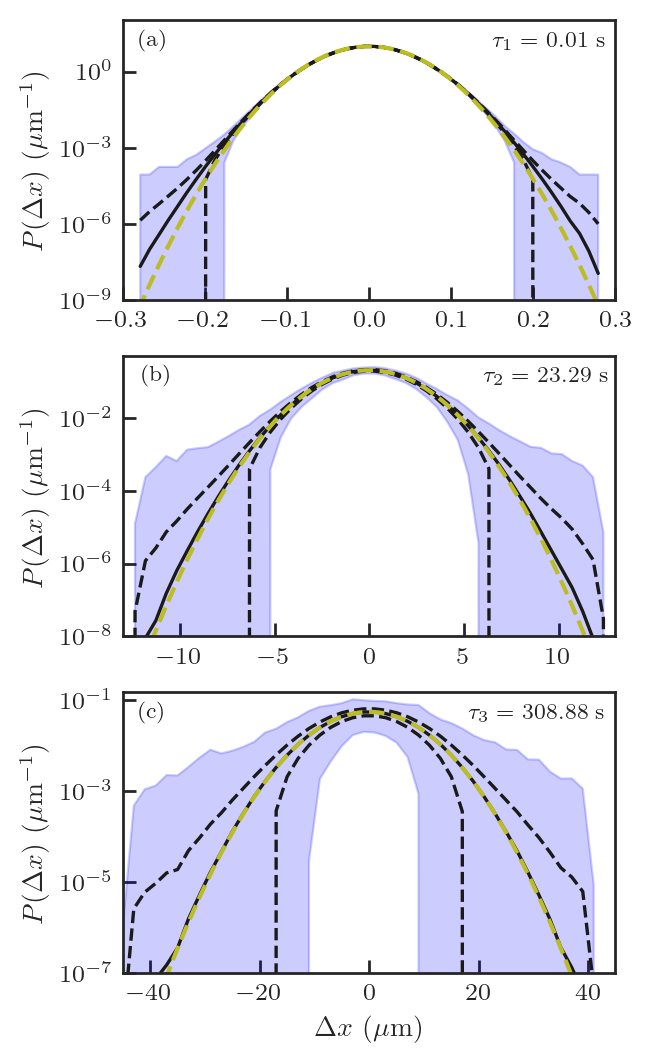

In [168]:
dxLONG = np.linspace(-60e-6, 60e-6, 100)
dxMID = np.linspace(-20e-6, 20e-6, 100)
dxCOURT = np.linspace(-0.4e-6, 0.4e-6, 1000)

# toutes les PDF de 1 trajectoires
fig = plt.figure(figsize = (3.3, 9/1.68),  tight_layout=True)

ax1 = plt.subplot(311)
Min = np.min(data_1, axis=0)
Max = np.max(data_1, axis=0)
Mean = np.mean(data_1, axis=0)
Std  = np.std(data_1, axis=0)
Z = np.trapz(Mean, dx_1*1e6)
ax1.semilogy(dx_1*1e6, Mean/ Z,"k-")
ax1.plot(dx_1*1e6, (Mean  + Std) / Z, "k--")
ax1.plot(dx_1*1e6, (Mean  - Std) / Z, "k--")
ax1.fill_between(dx_1*1e6, Min / Z, Max / Z, color='blue', alpha=0.2)
ax1.semilogy(dxCOURT*1e6, gauss(dxCOURT, 0, np.sqrt(2*mean_Dx*Ntime[n_court]*dt)) / np.trapz(gauss(dxCOURT, 0, np.sqrt(2*mean_Dx*Ntime[n_court]*dt)), dxCOURT*1e6) , 
         "--", color="tab:olive", linewidth=1.5,)
ax1.text(0.15, 10, r"$\tau_1 = $ "+ str(Ntime[n_court]*dt) + " s")
ax1.set_xlim(-0.3, 0.3)
# ax1.set_ylim(1e-5, 2e1)
ax1.set(
    # xlabel = r"$\Delta x$ ($\mu$m)",
    ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
)
ax1.text(-0.28, 10, r"(a)", transform=ax1.transData)
ax1.set_ylim(1e-9, None)


ax0 = plt.subplot(312)
Min = np.min(data_0, axis=0)
Max = np.max(data_0, axis=0)
Mean = np.mean(data_0, axis=0)
Std  = np.std(data_0, axis=0)
Z = np.trapz(Mean, dx_0*1e6)
ax0.semilogy(dx_0*1e6, Mean/ Z,"k-")
ax0.plot(dx_0*1e6, (Mean  + Std) / Z, "k--")
ax0.plot(dx_0*1e6, (Mean  - Std) / Z, "k--")
ax0.fill_between(dx_0*1e6, Min / Z, Max / Z, color='blue', alpha=0.2)
ax0.plot(dxMID*1e6, gauss(dxMID, 0, np.sqrt(2*mean_Dx*Ntime[n_mid]*dt)) / np.trapz(gauss(dxMID, 0, np.sqrt(2*mean_Dx*Ntime[n_mid]*dt)), dxMID*1e6),
        "--", color="tab:olive",linewidth=1.5,)

ax0.set_xlim(-13, 13)
ax0.set_ylim(1e-8, 5e-1)
ax0.text(6, 1e-1, r"$\tau_2 = $ "+ str(Ntime[n_mid]*dt) + " s")
ax0.set(
    # xlabel = r"$\Delta x$ ($\mu$m)",
    ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
)
ax0.text(-12, 1e-1, r"(b)", transform=ax0.transData)   


ax2 = plt.subplot(313)
Min = np.min(data_2, axis=0)
Max = np.max(data_2, axis=0)
Mean = np.mean(data_2, axis=0)
Std  = np.std(data_2, axis=0)
Z = np.trapz(Mean, dx_2*1e6)
ax2.semilogy(dx_2*1e6, Mean/ Z,"k-")
ax2.plot(dx_2*1e6, (Mean  + Std) / Z, "k--")
ax2.plot(dx_2*1e6, (Mean  - Std) / Z, "k--")
ax2.fill_between(dx_2*1e6, Min / Z, Max / Z, color='blue', alpha=0.2)
ax2.plot(dxLONG*1e6, gauss(dxLONG, 0, np.sqrt(2*mean_Dx*Ntime[n_long]*dt)) / np.trapz(gauss(dxLONG, 0, np.sqrt(2*mean_Dx*Ntime[n_long]*dt)), dxLONG*1e6), 
         "--", color="tab:olive",linewidth=1.5,)

ax2.set_xlim(-45, 45)
ax2.set_ylim(1e-7, 1.5e-1)
ax2.text(18, 4e-2, r"$\tau_3 = $ "+ str(Ntime[n_long]*dt) + " s", fontsize=8)
ax2.set(
    xlabel = r"$\Delta x$ ($\mu$m)",
    ylabel = r"$P(\Delta x)$ ($\mu$m$^{-1}$)",
)
ax2.text(-42, 4e-2, r"(c)", transform=ax2.transData)  


fig.tight_layout()
# plt.savefig("Figures/PDF_X_3times.pdf")

In [144]:
# Calcul du C4 en fonction de Ns

# Méthode <PDF> => C4
# tau_x_i =  Ntime[n_court]*1e-3
Nss= np.unique(np.logspace(0, 6, num = 40, base = 10, dtype=int))
C4_x_Ns_1 = np.zeros(len(Nss))
C4_x_Ns_0 = np.zeros(len(Nss))
C4_x_Ns_2 = np.zeros(len(Nss))

for n, i in enumerate(Nss):
        PDF = np.sum(data_1[:i, :], axis=0)
        PDF = PDF / np.trapz(PDF, dx_1)
        C4_x_Ns_1[n] = np.trapz(dx_1**4 *PDF, dx_1) - 3* (np.trapz(dx_1**2 * PDF, dx_1))**2
        
        PDF = np.sum(data_0[:i, :], axis=0)
        PDF = PDF / np.trapz(PDF, dx_0)
        C4_x_Ns_0[n] = np.trapz(dx_0**4 *PDF, dx_0) - 3* (np.trapz(dx_0**2 * PDF, dx_0))**2
        
        PDF = np.sum(data_2[:i, :], axis=0)
        PDF = PDF / np.trapz(PDF, dx_2)
        C4_x_Ns_2[n] = np.trapz(dx_2**4 *PDF, dx_2) - 3* (np.trapz(dx_2**2 * PDF, dx_2))**2
        
        


In [145]:
Nss

array([      1,       2,       4,       5,       8,      11,      17,
            24,      34,      49,      70,     100,     142,     203,
           289,     412,     587,     837,    1193,    1701,    2424,
          3455,    4923,    7017,   10000,   14251,   20309,   28942,
         41246,   58780,   83767,  119377,  170125,  242446,  345510,
        492388,  701703, 1000000])

In [146]:
# # Méthode PDFs => C4s => <C4>
# C4_x_Ns_11 = np.zeros(len(Nss))
# C4_x_Ns_00 = np.zeros(len(Nss))
# C4_x_Ns_22 = np.zeros(len(Nss))

# import warnings
# warnings.filterwarnings("error")

# C4_1 = []
# C4_0 = []
# C4_2 = []
# for j in tqdm(range(len(data_1[:, 0]))):
#     if (sum(data_1[j, :]) != 0 and sum(data_0[j, :])!=0 and sum(data_2[j, :])!=0):
#         PDF = data_1[j, :] / np.trapz(data_1[j, :], dx_1)
#         C4_1.append(np.trapz(dx_1**4 *PDF, dx_1) - 3* (np.trapz(dx_1**2 * PDF, dx_1))**2)
        
#         PDF = data_0[j, :] / np.trapz(data_0[j, :], dx_0)
#         C4_0.append(np.trapz(dx_0**4 *PDF, dx_0) - 3* (np.trapz(dx_0**2 * PDF, dx_0))**2)
        
        
#         PDF = data_2[j, :] / np.trapz(data_2[j, :], dx_2)
#         C4_2.append(np.trapz(dx_2**4 *PDF, dx_2) - 3* (np.trapz(dx_2**2 * PDF, dx_2))**2)
        
# for n, i in enumerate(Nss):
#     C4_x_Ns_11[n] = np.mean(C4_1[:i])
#     C4_x_Ns_00[n] = np.mean(C4_0[:i])
#     C4_x_Ns_22[n] = np.mean(C4_2[:i])

    

In [147]:
# from scipy.io import savemat

# Convergence_c4_3temps_M2 = {}
# Convergence_c4_3temps_M2["3 temps (s)"] = [Ntime[n_court]*dt, Ntime[n_mid]*dt, Ntime[n_long]*dt,]
# Convergence_c4_3temps_M2["C4_1"] = C4_x_Ns_11
# Convergence_c4_3temps_M2["C4_2"] = C4_x_Ns_00
# Convergence_c4_3temps_M2["C4_3"] = C4_x_Ns_22
# Convergence_c4_3temps_M2["Ns"] = Nss

# savemat("C4_Datas/Convergence_C4_methode2.mat", Convergence_c4_3temps_M2)

In [148]:
Convergence_M2 = loadmat("C4_Datas/Convergence_C4_methode2.mat", squeeze_me=True)
C4_x_Ns_11 = Convergence_M2['C4_1']
C4_x_Ns_00 = Convergence_M2['C4_2']
C4_x_Ns_22 = Convergence_M2['C4_3']
Nss = Convergence_M2['Ns']

In [149]:
C4_x_Ns_11

array([2.39323507e-31, 2.40488074e-31, 2.47837717e-31, 2.49771913e-31,
       2.41815854e-31, 2.39896215e-31, 2.41381103e-31, 2.42532815e-31,
       2.41061593e-31, 2.40134376e-31, 2.38170167e-31, 2.38004204e-31,
       2.35680280e-31, 2.34093915e-31, 2.34253340e-31, 2.34435986e-31,
       2.34170635e-31, 2.33400167e-31, 2.33204893e-31, 2.33239222e-31,
       2.33173059e-31, 2.33125699e-31, 2.33032466e-31, 2.32985258e-31,
       2.32962617e-31, 2.32950001e-31, 2.33114601e-31, 2.33280961e-31,
       2.33575455e-31, 2.33807924e-31, 2.33801984e-31, 2.33672459e-31,
       2.33813826e-31, 2.33841218e-31, 2.33870956e-31, 2.33829794e-31,
       2.33829470e-31, 2.33846134e-31])

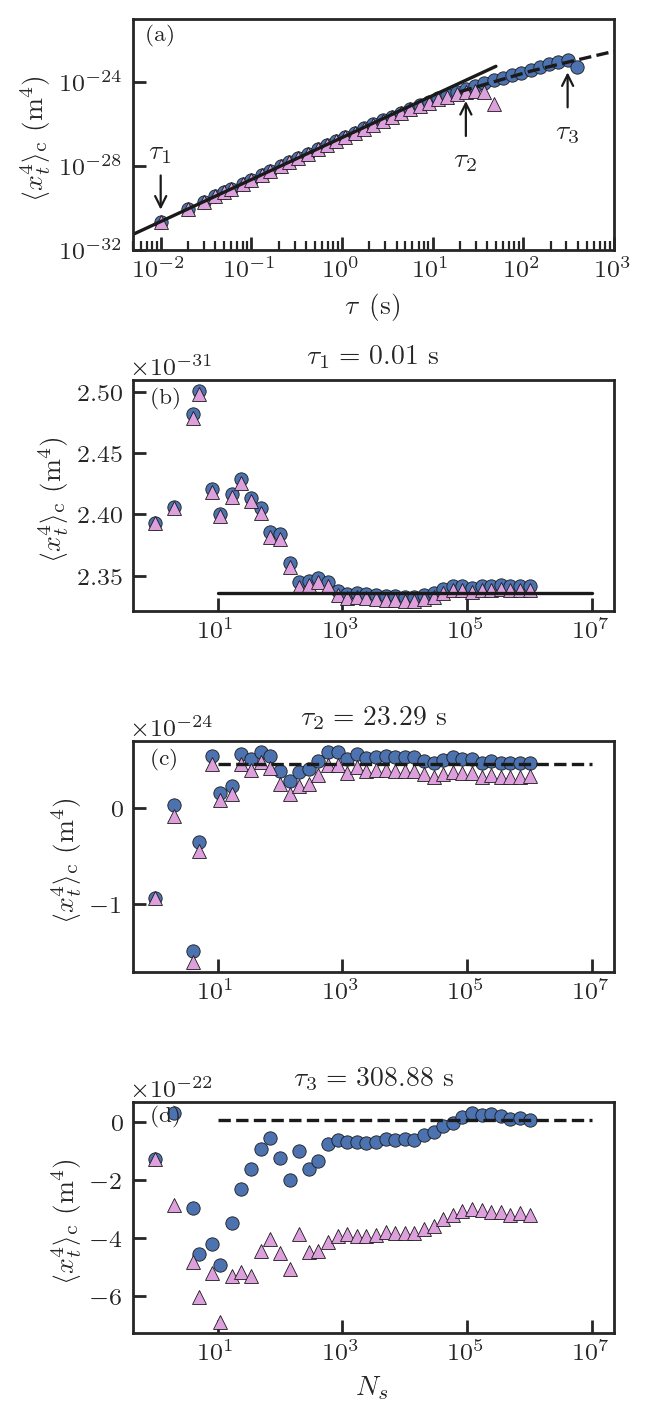

In [183]:
fig = plt.figure(figsize = (3.3, 12/1.68),  tight_layout=True)


ax1 = plt.subplot(411)
ax1.loglog(tau_x[:-4], C4_x[:-4], "o", label="M1")
ax1.loglog(M2_c4["time (s)"], M2_c4["C4 (m^4)"], "^", color="plum", label="M2")
ax1.plot(t_short, A4_theo_x*t_short**2, "k-" )
ax1.plot(t_long, 24*D4_long_theo*t_long-24*C4_long_theo, "k--" )
ax1.annotate(r"$\tau _1$", (tau_x[n_court], C4_x[n_court]*2), 
             xytext=(tau_x[n_court], C4_x[n_court]*1000), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax1.annotate(r"$\tau _2$", (tau_x[n_mid], C4_x[n_mid]/2), 
             xytext=(tau_x[n_mid], C4_x[n_mid]/5000), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)
ax1.annotate(r"$\tau _3$", (tau_x[n_long], C4_x[n_long]/2),
             xytext=(tau_x[n_long], C4_x[n_long]/5000), ha="center",
            arrowprops=dict(arrowstyle = "->", lw = 0.8, color= "k"), fontsize=10)

ax1.set(
    xlabel = r"$\tau$ (s)",
    ylabel = r"$\langle x^4_t \rangle_\mathrm{c}$ (m$^{4}$)",
)    
ax1.set_xlim(5e-3, 1e3)
ax1.set_ylim(1e-32, 1e-21)
ax1.text(7e-3, 1e-22, r"(a)", transform=ax1.transData)


ax2 = plt.subplot(412)
ax2.semilogx(Nss, C4_x_Ns_1, "o", label=r"M1")
ax2.semilogx(Nss, C4_x_Ns_11, "^", color="plum", label=r"M2")
ax2.plot(np.linspace(10, 1e7, 100), np.ones(100)*Convergence_court, "k-", label=r"Theory")
ax2.set_title(r"$\tau_1 = $ "+ str(Ntime[n_court]*dt) + " s")
ax2.set(
    # xlabel = r"$N_s$",
    ylabel = r"$\langle x^4_t \rangle_\mathrm{c}$ (m$^{4}$)",
)
ax2.text(0.9, 2.49e-31, r"(b)", transform=ax2.transData)

ax3 = plt.subplot(413)
ax3.semilogx(Nss, C4_x_Ns_0, "o", label=r"M1")
ax3.semilogx(Nss, C4_x_Ns_00, "^", color="plum", label=r"M2")
ax3.plot(np.linspace(10, 1e7, 100), np.ones(100)*Convergence_mid, "k--", label=r"Theory")
ax3.set_title(r"$\tau _2 = $ "+ str(Ntime[n_mid]*dt) + " s")
ax3.set(
    # xlabel = r"$N_s$",
    ylabel = r"$\langle x^4_t \rangle_\mathrm{c}$ (m$^{4}$)",
)
ax3.text(0.9, 4.5e-25, r"(c)", transform=ax3.transData)    



ax4 = plt.subplot(414)
ax4.semilogx(Nss, C4_x_Ns_2, "o", label=r"M1")
ax4.semilogx(Nss, C4_x_Ns_22, "^", color="plum", label=r"M2")
ax4.plot(np.linspace(10, 1e7, 100), np.ones(100)*Convergence_long, "k--", label=r"Theory")
ax4.set_title(r"$\tau _3 = $ "+ str(Ntime[n_long]*dt) + " s")
ax4.set(
    xlabel = r"$N_s$",
    ylabel = r"$\langle x^4_t \rangle_\mathrm{c}$ (m$^{4}$)",
)   
ax4.text(0.9, 1e-24, r"(d)", transform=ax4.transData)    

fig.tight_layout()

# plt.savefig("Figures/ConvergenceC4_court-long_Nsimu.pdf")

In [151]:
Convergence_court,Convergence_mid,Convergence_long

(2.335706168867776e-31, 4.609761359999998e-25, 9.159590591999999e-24)

In [152]:
err_court1 = np.abs(Convergence_court-C4_x_Ns_1[-1])/Convergence_court * 100
err_court2 =  np.abs(Convergence_court-C4_x_Ns_11[-1])/Convergence_court * 100

err_mid1 = np.abs(Convergence_mid-C4_x_Ns_0[-1])/Convergence_mid * 100
err_mid2 = np.abs(Convergence_mid-C4_x_Ns_00[-1])/Convergence_mid * 100

err_long1 = np.abs(Convergence_long-C4_x_Ns_2[-1])/Convergence_long * 100
err_long2 = np.abs(Convergence_long-C4_x_Ns_22[-1])/Convergence_long * 100


In [153]:
(err_court1, err_court2), (err_mid1, err_mid2), (err_long1, err_long2) 

((0.2563170332924371, 0.11795900208388152),
 (2.63979217536062, 28.058592604012123),
 (14.382885639339293, 3607.2471593001237))